## DBSCAN
DBSCAN = Density-based spatial clustering of applications with noise

DBSCAN es un algoritmo de clustering basado en la densidad. Dada una colección de puntos en un espacio (por ejemplo, en el plano), este algorimo agrupa los puntos que están muy juntos (puntos con muchos vecinos) e identifica como outliers aquéllos que están en regiones poco densas (puntos cuyos vecinos más cercanos están muy lejos).

Es uno de los algoritmos de clústering más utilizados.

- ¿Cómo identifica observaciones que son muy cercanas? Tomando todas las observaciones a menos de un cierto radio.

### Hiperparámetros
- ϵ
  (epsilon): radio máximo alrededor de un punto para considerar que otros puntos están “cerca” (vecinos).
- minPts: número mínimo de puntos en un vecindario para que un punto se considere core point (punto central de un cluster).
### Tipos de puntos
Supongamos que tenemos un dataset de puntos que queremos agrupar. Fijamos un parámetro  
ϵ
>
0
 , que mide el radio de una bola centrada en un punto, y un valor de minPts. DBSCAN clasifica los puntos del dataset en las siguientes categorías:

- Core point o punto nuclear: Un punto p es un punto nuclear si tiene al menos minPts en un entorno de radio  
ϵ, incluído p.
- Border point o punto frontera: Un punto p es un punto frontera si está a menos de ϵ de distancia de un punto nuclear, pero tiene menos de minPts vecinos.
- Noise point o punto ruido. Todos los puntos que no sean nucleares ni frontera.

### Algoritmo
El algoritmo de DBSCAN puede sintetizarse en los siguientes pasos:

1. Marcar todos los puntos como no visitados.
2. Tomar un punto no visitado al azar y tomar su entorno de radio ϵ.
  - Si en este entorno hay al menos minPts puntos, se marca como punto nuclear y se inicia un clúster. Se añaden a    este clúster todos los vecinos dentro de entorno. Para cada uno de estos vecinos:
    1. Si es un punto nuclear, sus vecinos se añaden al conglomerado recursivamente.
    2. Si no es un punto nuclear, se marca como punto fronterizo y la expansión se detiene.
  - Si hay menos de minPts puntos, marcar el punto como ruido temporalmente.
3. Repetir el punto 2 recursivamente para todos los vecinos que hemos ido encontrando, hasta haber encontrado todo el clúster.
4. Todos los puntos revisados se marcan como visitados.
5. Tomar otro punto no visitado y repetir los pasos 2-4 hasta que no queden puntos sin visitar.

### Elección de los hiperparámetros

Elección de minPts:

Nótese que el valor minPts=1 no tiene sentido, ya que todo punto sería nuclear.

Generalemente, si n denota el número de variables, se requiere que  minPts≥n+1. En general, se suele tomar

minPts=2n.
 
Si los datos tienen ruido o quieres detectar clústers más pequeños, tal vez quieras disminuir MinPts.

Elección de ϵ:

Si ϵ
  es demasiado pequeño, gran parte de los puntos no serán incluidos en ningún clúster, sino marcados como ruido. Al contrario, si  
ϵ
  es demasiado grande, veremos la aparición de pocos clústers pero muy grandes. Una manera de elegir  
ϵ
  consiste en representar gráficamente la distancia a los  
m
i
n
P
t
s
−
1
  vecinos más cercanos, ordenados de mayor a menor. El valor adecuado de  
ϵ
  es aquél donde la gráfica muestra un "codo".

## Implementación
Vamos a implementar DBSCAN directamente con la librería scikitlearn.

In [3]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot  as plt
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris

Este dataset contiene datos sobre flores de iris, con 4 variables, así como la clase a la que pertenecen (3 clases en total).



In [4]:
iris = load_iris()
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)

iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)

iris_df['original_label'] = iris.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),original_label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


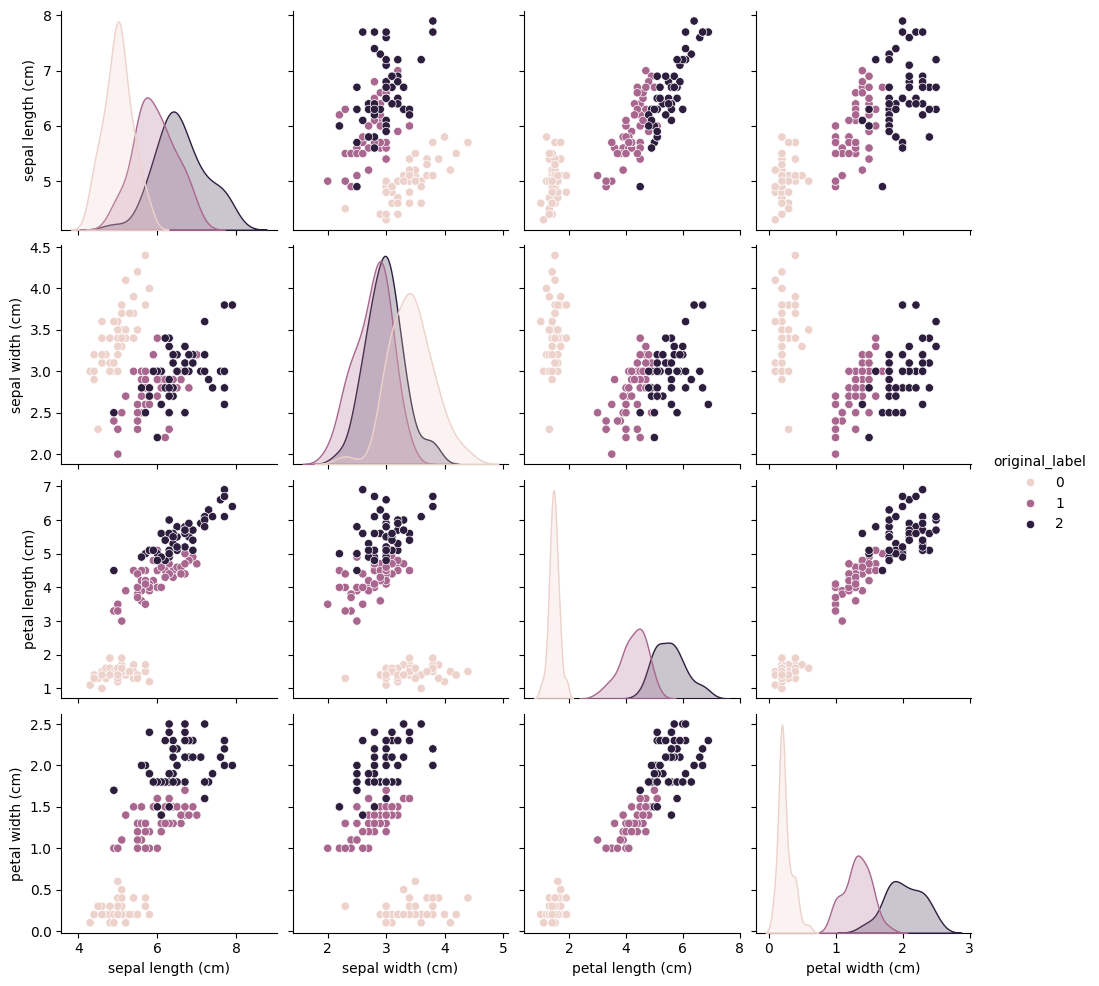

In [5]:
sns.color_palette("pastel")
sns.pairplot(iris_df,hue='original_label')
plt.show()

In [10]:
cols = iris_df.columns[:-1]  # Exclude 'original_label'

X = iris_df[cols].copy()

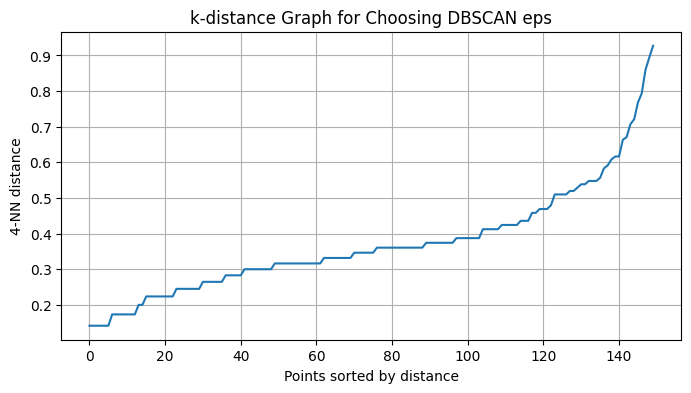

In [11]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors


k = 4   # usually min_samples - 1; you can tune it

# Fit nearest neighbors
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, indices = nbrs.kneighbors(X)

# distances[:, k-1] = distance to the k-th nearest neighbor
k_distances = np.sort(distances[:, k-1])

# Plot the k-distance graph
plt.figure(figsize=(8,4))
plt.plot(k_distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{k}-NN distance")
plt.title("k-distance Graph for Choosing DBSCAN eps")
plt.grid(True)
plt.show()

Codo: donde la curva empieza a subir rápidamente.

In [12]:
dbscan = DBSCAN(eps=0.5,min_samples=5)
y_pred = dbscan.fit_predict(X)

scikit-learn marca como -1 los puntos de ruido.

In [13]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [14]:
# Indices of core samples 
len(dbscan.core_sample_indices_)

117

In [15]:
# Copy of each core sample found by training.
dbscan.components_[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [16]:
iris_df["cluster"] = dbscan.labels_
iris_df.groupby(['original_label','cluster']).agg({'sepal length (cm)': 'count'})

sepal length (cm)
original_label cluster                   
0              -1                       1
                0                      49
1              -1                       6
                1                      44
2              -1                      10
                1                      40

## Ventajas y limitaciones
### Ventajas
- No requiere especificar a priori el número de clústers.
- DBSCAN crea clústers de formas arbitrarias.
- Detecta el ruido, y por lo tanto es robusto frente a outliers.
### Limitaciones
- Sensible a la escala.
- Requiere conocimientos para elegit los hiperparámetros correctamente.
- No es un algoritmo completamente determinista: hay puntos que pueden ser asignados a un clúster o a otro, dependiendo del orden en el que se tomen los puntos (aunque esto es poco frecuente).
- Dependencia de la función de distancia elegida. La más común es la distancia euclídea, pero en dimensiones muy altas no es adecuada.
- Cuando el dataset presenta densidades muy variables, DBSCAN no es adecuado porque ninguna combinación de valores de  
ϵ
  y minPts se adapta correctamente.
### Cuándo usar DBSCAN
- Clústers de forma irregular. Ideal cuando los grupos no son esféricos.
- Cuando hay ruido o outliers. Muy útil en datos con mediciones erróneas o valores atípicos.
- Cuando no se conoce el número de clústers.
- Clústers de densidades razonablemente parecidas pero no idénticas.
- Datos de baja o moderada dimensionalidad
- Útil para visualizar o detectar estructura en datos sin etiquetas, especialmente combinando con reducción de dimensionalidad.